In [6]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Accuracy : 0.9333
Precision: 0.9444
Recall : 0.9333

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


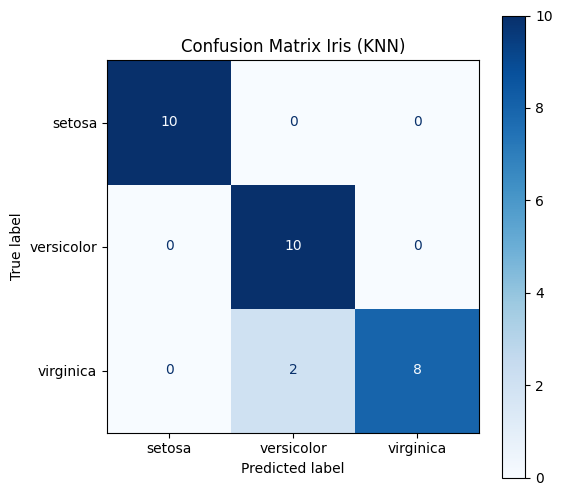

In [ ]:
# 1. Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
 confusion_matrix,
 accuracy_score,
 precision_score,
 recall_score,
 ConfusionMatrixDisplay
)
# 2. Load data Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

# 3. Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42, stratify=y
)
# 4. Inisialisasi dan training KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# 5. Prediksi pada test set
y_pred = knn.predict(X_test)

# 6. Evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall : {rec:.4f}")
print("\nConfusion Matrix:")
print(cm)

# 7. Visualisasi Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
 display_labels=class_names)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix Iris (KNN)")
plt.show()



Nilai K terbaik: 3
Akurasi tertinggi: 1.0000


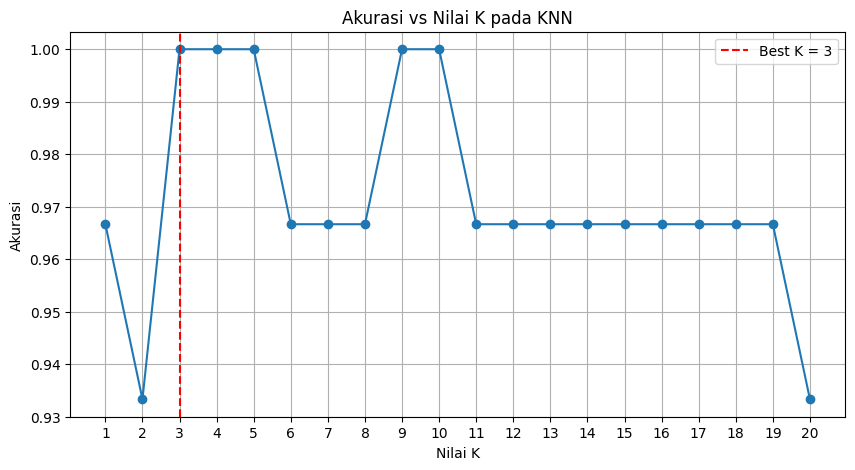

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 2. Load dataset Iris
iris = datasets.load_iris()
X, y = iris.data, iris.target

# 3. Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Cari nilai K terbaik berdasarkan akurasi
k_values = range(1, 21)
accuracies = []
for k in k_values:
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train, y_train)
 y_pred = knn.predict(X_test)
 acc = accuracy_score(y_test, y_pred)
 accuracies.append(acc)

# 5. Menentukan K dengan akurasi tertinggi
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"Nilai K terbaik: {best_k}")
print(f"Akurasi tertinggi: {best_acc:.4f}")

# 6. Plot K vs Akurasi
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Akurasi vs Nilai K pada KNN')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.axvline(best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.show()

In [7]:
import pandas as pd

# Load dataset harga mobil bekas
file_path = "/content/drive/MyDrive/Colab Notebooks/harga_mobil_bekas.csv"
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
df.head()


,Merek,Model,Tahun,JarakTempuh,UkuranMesin,Transmisi,Harga
0,Toyota,Avanza,2018,75000,1300,Manual,145
1,Honda,Brio,2019,60000,1200,Automatic,155
2,Suzuki,Ertiga,2017,90000,1500,Manual,130
3,Toyota,Innova,2016,110000,2000,Automatic,240
4,Daihatsu,Xenia,2019,65000,1300,Manual,140


In [8]:
from sklearn.preprocessing import LabelEncoder

# Salin data
data = df.copy()

# Ubah harga menjadi klasifikasi: 1 = Mahal, 0 = Murah
mean_price = data['Harga'].mean()
data['KelasHarga'] = (data['Harga'] > mean_price).astype(int)

# Encode kolom kategori
le_merek = LabelEncoder()
le_model = LabelEncoder()
le_trans = LabelEncoder()

data['Merek'] = le_merek.fit_transform(data['Merek'])
data['Model'] = le_model.fit_transform(data['Model'])
data['Transmisi'] = le_trans.fit_transform(data['Transmisi'])

# Drop kolom harga asli
data = data.drop(columns=['Harga'])

# Cek hasil
data.head()


,Merek,Model,Tahun,JarakTempuh,UkuranMesin,Transmisi,KelasHarga
0,4,4,2018,75000,1300,1,0
1,1,9,2019,60000,1200,0,0
2,3,17,2017,90000,1500,1,0
3,4,25,2016,110000,2000,0,1
4,0,46,2019,65000,1300,1,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Pisahkan fitur dan label
X = data.drop(columns='KelasHarga')
y = data['KelasHarga']

# Normalisasi Min-Max
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Cari nilai K terbaik dengan jarak Euclidean
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Nilai K terbaik
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

best_k, best_accuracy


(1, 0.8)

Akurasi : 0.8000
Presisi : 0.7500
Recall  : 0.6000

Confusion Matrix:
[[9 1]
 [2 3]]


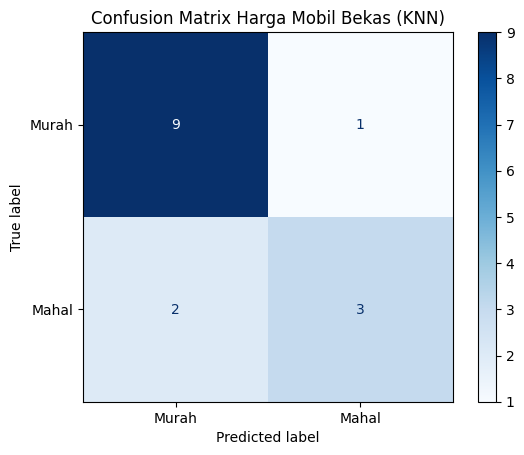

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Model terbaik: K=1, euclidean, dengan normalisasi
model_knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model_knn.fit(X_train_scaled, y_train)
y_pred = model_knn.predict(X_test_scaled)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Cetak hasil
print(f"Akurasi : {accuracy:.4f}")
print(f"Presisi : {precision:.4f}")
print(f"Recall  : {recall:.4f}")
print("\nConfusion Matrix:")
print(cm)

# Visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Murah", "Mahal"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix Harga Mobil Bekas (KNN)")
plt.show()
